<a href="https://colab.research.google.com/github/wjdwnsgur96/class2022Spring/blob/main/sound_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

In [7]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

#amp = 진폭
#sr = sample rate 1초에 몇개의 sample로 구성되어 있는가
#dur = duration 소리가 몇초인가
#freq= frequency 1초에 몇번 왔다 갔다 하는가
#phase = 시작점이 몇도인가? (radian 기준, phase=shift)
#기본적인 sine 곡선의 parameter 

In [13]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

#sample ticks -> sampling rate와 관련 있음
#sine wave를 만들기 전에 원하는 duration까지 tick을 설정해야 함
#시험문제 Ex. 위 설정에서 dur이 1초면 10000번째 tick이 나오는 지점. 
#sampling rate이 1초에 10000이기 때문
#시험문제 Ex2. len(samples)를 하면 몇개가 나오는가? (len=길이,length)
#정답. 5000개

In [14]:
# convert sample to time (sec)
t = samples/sr

#sample tick을 time tick으로 전환
#1/10000,2/10000,3/10000....5000/10000
#dur이 0.5초이기 때문에 5000까지만 설정
#len(t) = 5000

In [16]:
# convert time to angle (radian)
theta0 = t * 2*np.pi * freq

#time tick을 angle tick으로 전환
#freq -> 현재 설정에서는 1초에 100번 왔다 갔다 함
#radian에서 한바퀴 돌 때 2파이 
#이 때 1초에서 radian은 frequency가 1초에 100번 왔다 갔다 하기 때문에 2파이*100
#2파이*freq*dur이라는 공식이 성립된다
#여기서는 (1/10000,2/10000...5000/10000)*2파이*100이라는 결론이 나온다. 
#len(theta0) = 5000

In [18]:
# shift angle by phase
theta = theta0 + phase

#(1/10000,2/10000...5000/10000)*2파이*100+phase
#틱을 전체적으로 shift 시켜줌 (phase=shift, 예컨대 phase값이 1/100파이면 그만큼 shift)

In [20]:
# generate signal by sin-phasor
s = amp * np.sin(theta)

#사인 곡선 생성

Text(0, 0.5, 'real')

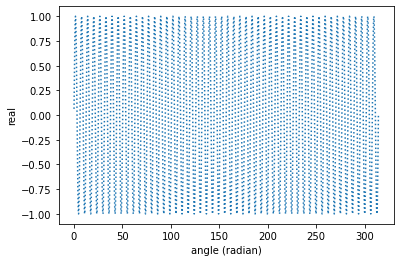

In [21]:
# plot the entire signal
plt.plot(theta, s, ':')
plt.xlabel('angle (radian)')
plt.ylabel('real')

#총 5000개의 value 존재
#x축 = angle(radian)
#y축 = real

Text(0, 0.5, 'real')

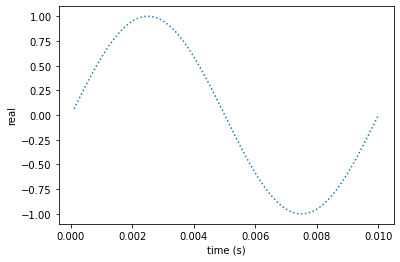

In [22]:
# plot a certain portion of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

#sample의 0번째부터 99번째까지 반복
#앞에 100개의 점들만 plotting하여 sine wave 확인
#x축 = time
#y축 = real

In [24]:
ipd.Audio(s, rate=sr)

#만든 sine wave 오디오 파일 생성
#rate=sr -> 위에서 설정한 sr을 rate으로 설정하는 것. 꼭 해야 함!
#여기서는 100hz frequency의 소리 재생
#위에서 frequency 값을 바꾸면 재생되는 소리 또한 달라짐

In [25]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [26]:
amp = 1; sr = 10000; dur = 1; freq = 110; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

#phasor_sine -> 사인 곡선의 다양한 parameter들을 정의해서 function을 만들어줌

### Phasor (complex)

complex number를 써서 phasor를 만들어줄 수도 있음

In [34]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [35]:
# generate sample ticks
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [36]:
# convert samples to time
t = samples/sr

In [37]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [38]:
# shift angle by phase
theta = theta0 + phase

In [39]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)

In [40]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [41]:
# plot a certain portion of signals
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [42]:
ipd.Audio(c, rate=sr)

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning:

Casting complex values to real discards the imaginary part



In [43]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [44]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.real, rate=sr)

In [51]:
import numpy as np

x = np.array([1,2,3,4])
x.shape

(4,)

In [52]:
y=x.reshape(2,1,-3)

In [53]:
import numpy as np
x = np.ones([2, 2, 3])

In [54]:
x.shape

(2, 2, 3)

In [55]:
x

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])